<h1> Mario Iskandar - 2502014841 - LA05 </h1>
<h2> Computer Science and Mathematics </h2>
<h3> Link Video: </h3>
<p>https://binusianorg-my.sharepoint.com/personal/mario_iskandar_binus_ac_id/_layouts/15/guestaccess.aspx?share=EgqAVgw4VFNImJzov6adprQBoC4jrUYaC1y37u0V9HDcMw&e=4866YY</p>
<p>Alternatif: https://youtu.be/oIKDDYJLgps</p>

# 1a) Data cleaning & window structure

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras_self_attention as ksa

In [2]:
tf.keras.utils.set_random_seed(41)

Set random seed untuk tf.keras, aku pake 41 untuk menyesuaikan dengan 2 digit NIM saja, sebenarnya bebas

In [3]:
df = pd.read_csv('./X.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,76180670.0
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,105493978.0
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,59712955.0
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,56236668.0
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,31319315.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3808 non-null   object 
 1   Open       3807 non-null   float64
 2   High       3807 non-null   float64
 3   Low        3807 non-null   float64
 4   Close      3807 non-null   float64
 5   Adj Close  3807 non-null   float64
 6   Volume     3807 non-null   float64
dtypes: float64(6), object(1)
memory usage: 208.4+ KB


In [5]:
print(np.sum(df.isna()))
print("duplicated data:", np.sum(df.duplicated()))

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64
duplicated data: 0


- Hanya ada 1 data dari kolom Open, High, Low, Close, Adj Close, dan Volume yang memiliki missing value sehingga bisa langsung di drop saja
- Tidak ada duplicated data

In [6]:
df = df.dropna()

- Drop missing values

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
columns_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

df[columns_to_convert] = df[columns_to_convert].astype(float)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,76180670.0
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,105493978.0
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,59712955.0
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,56236668.0
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,31319315.0


- Converting Date menjadi datetime dengan format year-month-date
- Sedangkan kolom lainnya menjadi float

In [8]:
headers = list(df.columns.values)
headers.remove('Date')
headers

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

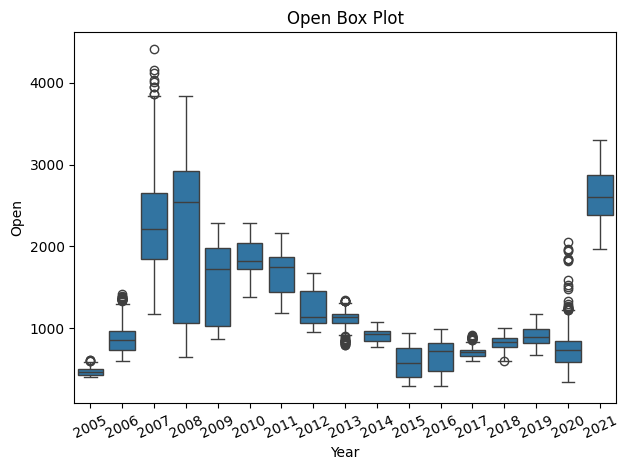

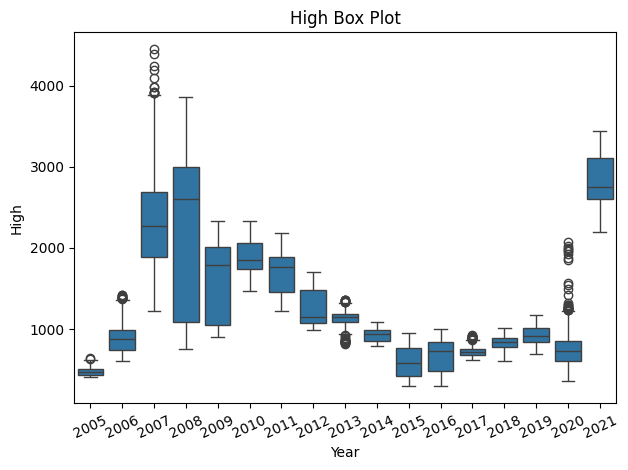

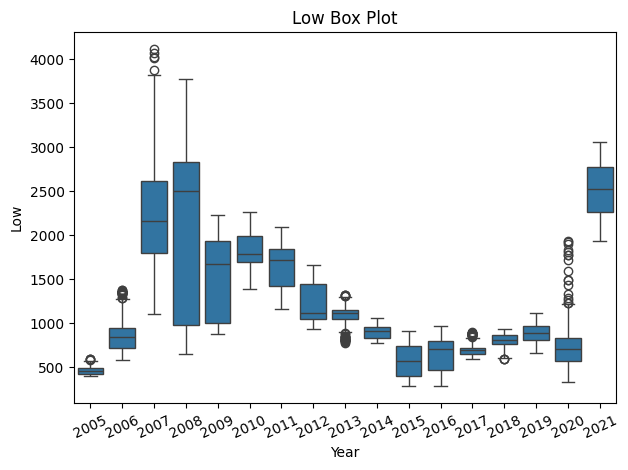

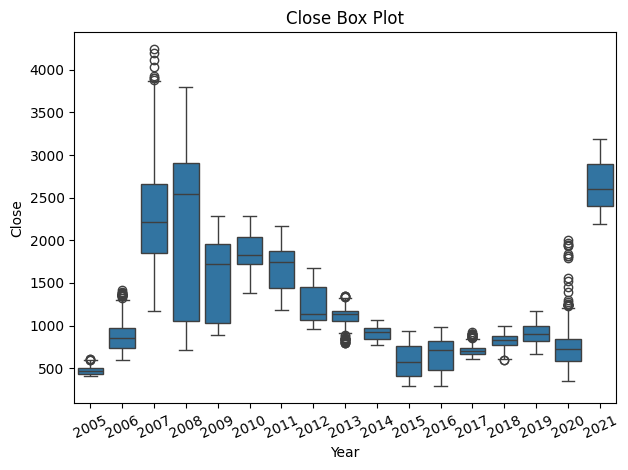

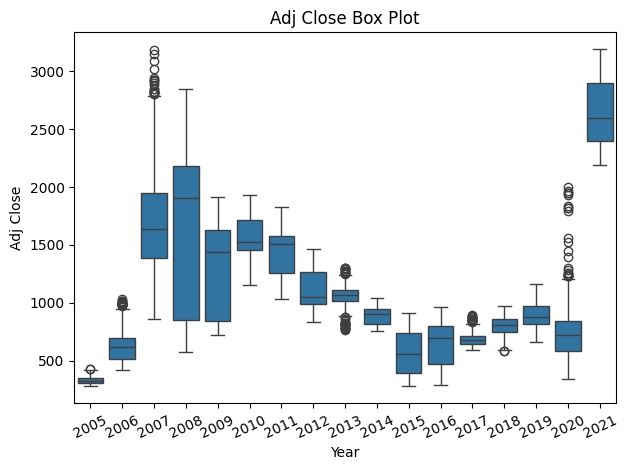

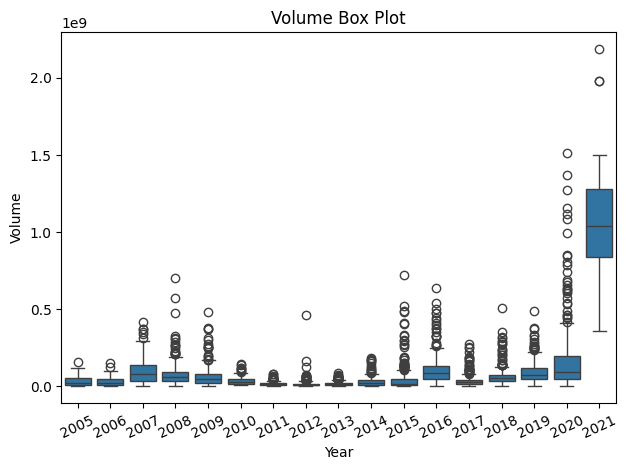

In [9]:
def plot_box_for_header(df, header):
    sns.boxplot(x=df['Date'].dt.year, y=df[header])
    plt.xlabel('Year')
    plt.ylabel(header)
    plt.title(f'{header} Box Plot')
    plt.xticks(rotation=25)
    plt.tight_layout()
    plt.show()
  
for header in headers:
  plot_box_for_header(df, header)

- Ada banyak sekali outlier pada dataset
- Untuk menghandle outlier, harus disesuaikan case by case tergantung datasetnya mengenai apa
- Karena dataset ini merupakan data stock, kita tidak dapat menghandle outliers dengan membuang outlier begitu saja karena anggapannya adalah setiap outlier yang ada merupakan representasi atau gambaran real dari stock market (sesuai phrase 'market discounts everything'). Jadi outlier yang ada bisa disebabkan oleh banyak faktor sehingga mungkin dapat menjadi bagian dari pola yang terjadi pada suatu stock
- Kita hanya akan melakukan scaling pada kolom fokus utama kita, yaitu kolom 'close' untuk menghandle outlier dengan men-smoothing outlier

In [10]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df['Close'] = scaler.fit_transform(df[['Close']])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,-0.631785,304.904572,7.618067e+07
1,2005-09-30,457.787384,457.787384,432.588074,-0.601459,322.666016,1.054940e+08
2,2005-10-03,470.387024,474.586914,440.987854,-0.586296,331.546692,5.971296e+07
3,2005-10-04,474.586914,482.986694,466.187164,-0.581242,334.506927,5.623667e+07
4,2005-10-05,482.986694,482.986694,466.187164,-0.571134,340.427429,3.131932e+07
...,...,...,...,...,...,...,...
3803,2021-01-28,2470.000000,2570.000000,2380.000000,1.711795,2380.000000,7.318549e+08
3804,2021-01-29,2370.000000,2440.000000,2220.000000,1.519246,2220.000000,4.503212e+08
3805,2021-02-01,2090.000000,2640.000000,2070.000000,1.976550,2600.000000,2.186653e+09
3806,2021-02-02,2600.000000,2630.000000,2420.000000,1.759932,2420.000000,9.424343e+08


- Data sudah bersih jadi tidak perlu diprocessing terlalu detail
- Hanya melakukan scaling menggunakan robust scaler untuk smoothing outlier
- Tidak menggunakan minmax scaler karena sangat sensitif terhadap outlier, sedangkan untuk robust scaler sendiri tidak terlalu sensitif dengan outlier karena menggunakan formula (Xi-medianX)/Xiqr -> Xiqr adalah interquartile range

In [11]:
#CHECKPOINT
df_cleaned = df.copy()

- Kita membuat sebuah checkpoint untuk data yang sudah bersih
- Kemudian data yang sudah bersih tersebut akan dibuat windownya untuk bagian kolom 'close' yang merupakan bagian yang akan kita fokuskan untuk model GRU nya

In [12]:
def create_windows(df):
  x = []
  y = []
  for i in range(5, len(df)):
    x.append(df.iloc[i - 5:i, 0])
    y.append(df.iloc[i, 0])
  return (np.array(x), np.array(y))

- Membuat fungsi untuk window
- Window dengan size 5 untuk mempertimbangkan sebuah sequence dari 5 titik point sebagai input dalam setiap segment untuk membantu menangkap pattern atau trend dalam suatu data
- Horizon dengan size 1 untuk memperkirakan 1 data selanjutnya

In [13]:
x_data, y_data = create_windows(df_cleaned[['Close']])
print(x_data.shape, y_data.shape)
print(y_data)

(3802, 5) (3802,)
[-0.5913507  -0.58629645 -0.5913507  ...  1.97655024  1.75993229
  1.65162331]


# 1b) Separate data

In [14]:
from sklearn.model_selection import train_test_split

data = df_cleaned.sort_values(by='Date')

x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size = 0.2, shuffle = False)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, shuffle = False)

- Split data untuk train, test, dan validation dengan ratio 70%,15%,15%
- shuffle diset False karena merupakan data timeseries, agar waktunya tidak ada yg kerandom

In [64]:
# Reshaping data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_val = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(3041, 5, 1)
(380, 5, 1)
(381, 5, 1)


- Data yang sudah dibagi-bagi akan direshape sesuai struktur window agar nanti dapat digunakan dalam pembuatan model

# 1c) Creating GRU Architecture

In [16]:
input_shape = (x_train.shape[1], x_train.shape[2])
model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(units=256, input_shape=input_shape, return_sequences=True),

    tf.keras.layers.GRU(units=128, input_shape=input_shape, return_sequences=True),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.GRU(units=128, input_shape=input_shape, return_sequences=False),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(units=1)
])

- The first layer is a GRU layer with 256 units (memory cells). It takes the previously defined input_shape and is set to return sequences (return_sequences=True), which means it will output the full sequence of outputs for each input sequence.
- Layer pertama adalah GRU layer dengan 256 unit dengan input_shapenya  sesuai dengan shape dari (x_train[1],x_train[2]) yaitu (5,1) dengan return sequence True, Layer kedua dan ketiga juga GRU dengan 128 unit dengan masing-masing dropout 0.2 agar model tidak menjadi overfit (lebih tergeneralisasi). Di akhir ada layer output dengan jumlah 1 unit untuk mengembalikan output dengan continuous value

Component Pada GRU:
- Hidden State: suatu memory pada setiap stepnya
- Update Gate: Mengontrol seberapa banyak hidden state sebelumnya yang akan disimpan dan seberapa banyak kandidat hidden state yang baru.
- Reset Gate: Menentukan seberapa banyak hidden state sebelumnya yang akan dihapus.

In [17]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 256)            198912    
                                                                 
 gru_1 (GRU)                 (None, 5, 128)            148224    
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 gru_2 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 446,337
Trainable params: 446,337
Non-trai

In [18]:
callback = tf.keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)
history = model.fit(x_train, y_train, 
                    epochs = 100, 
                    batch_size = 64, 
                    validation_data = (x_val, y_val), 
                    callbacks = [callback])

Epoch 1/100
48/48 [==============================] - 18s 100ms/step - loss: 0.0831 - mean_absolute_error: 0.1545 - val_loss: 0.0019 - val_mean_absolute_error: 0.0340
Epoch 2/100
48/48 [==============================] - 3s 57ms/step - loss: 0.0147 - mean_absolute_error: 0.0742 - val_loss: 0.0014 - val_mean_absolute_error: 0.0279
Epoch 3/100
48/48 [==============================] - 2s 50ms/step - loss: 0.0134 - mean_absolute_error: 0.0717 - val_loss: 0.0015 - val_mean_absolute_error: 0.0295
Epoch 4/100
48/48 [==============================] - 3s 58ms/step - loss: 0.0119 - mean_absolute_error: 0.0669 - val_loss: 0.0013 - val_mean_absolute_error: 0.0271
Epoch 5/100
48/48 [==============================] - 3s 55ms/step - loss: 0.0126 - mean_absolute_error: 0.0696 - val_loss: 0.0014 - val_mean_absolute_error: 0.0278
Epoch 6/100
48/48 [==============================] - 3s 56ms/step - loss: 0.0123 - mean_absolute_error: 0.0689 - val_loss: 0.0013 - val_mean_absolute_error: 0.0269
Epoch 7/100
48

# 1d) Adding Sequential Self Attention Mechanism 

In [19]:
input_shape = (x_train.shape[1], x_train.shape[2])
model_self_attention = tf.keras.models.Sequential([
    tf.keras.layers.GRU(units=256, input_shape=input_shape, return_sequences=True),

    tf.keras.layers.GRU(units=128, input_shape=input_shape, return_sequences=True),
    ksa.SeqSelfAttention(attention_activation='sigmoid'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.GRU(units=128, input_shape=input_shape, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=1)
])

c:\Users\qwerty\.conda\envs\deeplearning\lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Sequential Self Attention:
- Sebuah scaled dot product yang membuat suatu model dapat menentukan relevansi dari berbagai bagian input yang diberikan sehingga model dapat berfokus kepada berbagai bagian sequence input dalam mengupdate hidden state. Sequntial self attention dapat membantu menangkap long range dependencies dengan mempertimbangkan semua informasi yang didapat dari step-step sebelumnya.

Cara kerja Sequential Self Attention:
- Menghitung attention score dari setiap step sebelumnya dan kemudian akan dihitung menggunakan weighted sum dari step sebelumnya.
- Weighted sum akan dihitung dari hidden state sebelumnya berdasarkan attention score sehingga dapat merepresentasikan informasi dari step-step sebelumnya
- Weighted sum dari hidden state sebelumnya akan digabungkan dengan input yang baru sehingga membentuk augmented input.
- Augmented input akan dipassing ke update dan reset gate untuk dihitung sebagai hidden state yang baru



In [20]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_self_attention.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
model_self_attention.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 5, 256)            198912    
                                                                 
 gru_4 (GRU)                 (None, 5, 128)            148224    
                                                                 
 seq_self_attention (SeqSelf  (None, 5, 128)           8257      
 Attention)                                                      
                                                                 
 dropout_2 (Dropout)         (None, 5, 128)            0         
                                                                 
 gru_5 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

In [21]:
callback = tf.keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)
history_self_attention = model_self_attention.fit(x_train, y_train, 
                    epochs = 100, 
                    batch_size = 64, 
                    validation_data = (x_val, y_val),
                    callbacks=[callback])


Epoch 1/100
48/48 [==============================] - 20s 104ms/step - loss: 0.0987 - mean_absolute_error: 0.1720 - val_loss: 0.0021 - val_mean_absolute_error: 0.0355
Epoch 2/100
48/48 [==============================] - 3s 53ms/step - loss: 0.0167 - mean_absolute_error: 0.0798 - val_loss: 0.0018 - val_mean_absolute_error: 0.0328
Epoch 3/100
48/48 [==============================] - 2s 46ms/step - loss: 0.0159 - mean_absolute_error: 0.0786 - val_loss: 0.0019 - val_mean_absolute_error: 0.0329
Epoch 4/100
48/48 [==============================] - 3s 56ms/step - loss: 0.0164 - mean_absolute_error: 0.0778 - val_loss: 0.0018 - val_mean_absolute_error: 0.0322
Epoch 5/100
48/48 [==============================] - 2s 50ms/step - loss: 0.0152 - mean_absolute_error: 0.0767 - val_loss: 0.0018 - val_mean_absolute_error: 0.0325
Epoch 6/100
48/48 [==============================] - 3s 59ms/step - loss: 0.0145 - mean_absolute_error: 0.0767 - val_loss: 0.0019 - val_mean_absolute_error: 0.0327
Epoch 7/100
48

In [53]:
def plot_metrics(ax, history, metric, title):
    ax.plot(history.history[metric], label='Training')
    ax.plot(history.history[f'val_{metric}'], label='Validation')
    ax.legend()
    ax.set_xlabel('Epochs')
    ax.set_ylabel(metric.capitalize())
    ax.set_title(title)

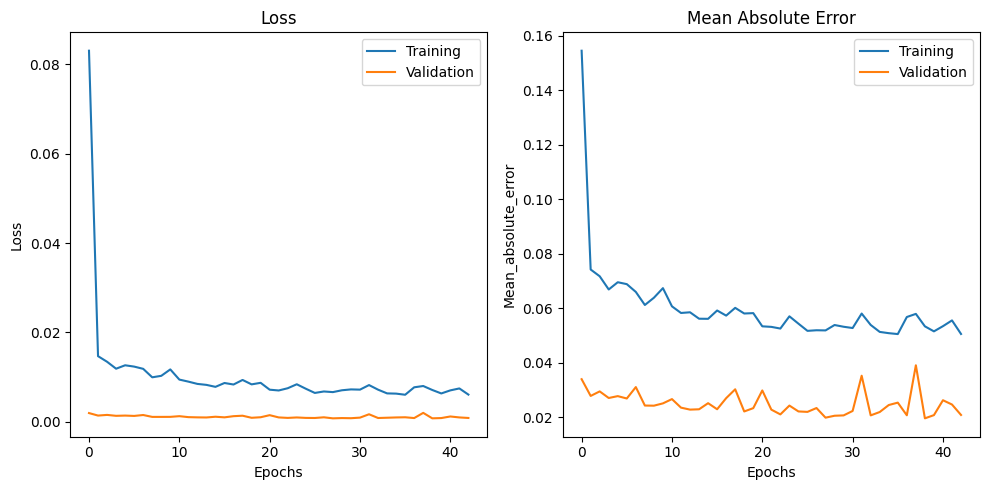

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_metrics(axes[0], history, 'loss', 'Loss')
plot_metrics(axes[1], history, 'mean_absolute_error', 'Mean Absolute Error')

plt.tight_layout()
plt.show()


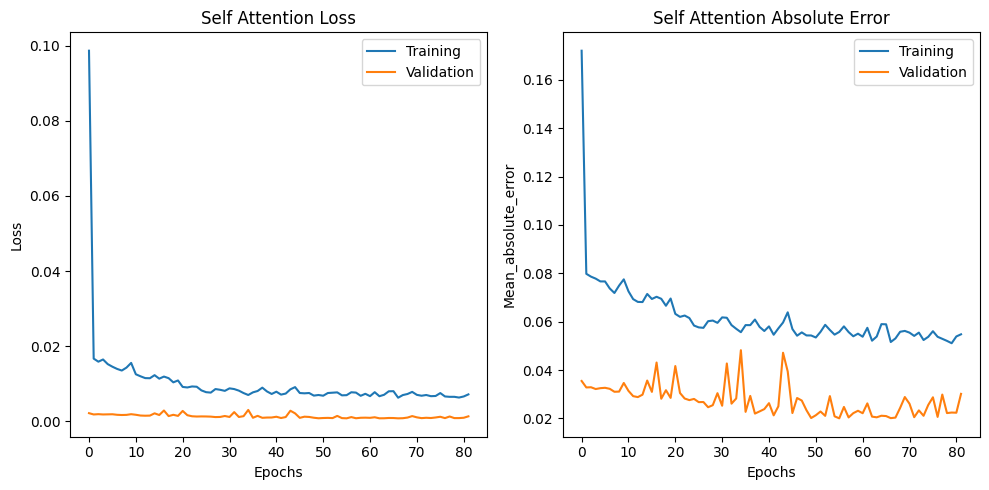

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plot_metrics(axes[0], history_self_attention, 'loss', 'Self Attention Loss')
plot_metrics(axes[1], history_self_attention, 'mean_absolute_error', 'Self Attention Absolute Error')

plt.tight_layout()
plt.show()


- Model GRU dan Self Attentioned GRU memiliki loss yang sangat kecil
- Model sebenarnya belum mengalami convergence, tetapi karena menggunakan epoch yang terbatas, maka batas patience model juga diperkecil sehingga model mudah mengalami early stopping dari callback function. Jika diteruskan dengan epoch yang besar (misalnya 150-200) dengan patience pada callback function early stopping yang besar juga (misalnya hingga 30-40 epoch) maka bisa saja model akan terus belajar dengan baik hingga mengalami konvergensi
- Jika dilihat dari chartnya, maka model masih dapat dikatakan underfit karena belum mencapai titik konvergensinya

# 1e) Evaluation Metrics

In [23]:
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

loss_self_attention = model_self_attention.evaluate(x_test, y_test)
print(f"Test Loss: {loss_self_attention}")

12/12 [==============================] - 0s 5ms/step - loss: 0.0056 - mean_absolute_error: 0.0382
Test Loss: [0.0056108348071575165, 0.0382104329764843]
12/12 [==============================] - 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0415
Test Loss: [0.00632086955010891, 0.041502293199300766]


- Test loss dan mean_absolute_error dari model GRU dan self attention GRU bernilai sangat kecil
- Loss (dari metric mean squared error) : 0.0056 dan 0.0063
- MAE : 0.0382 dan 0.0415
- jika hanya dilihat dari metric ini saja, model terlihat sudah baik ketika dievaluasi
- *Loss dan MAE sangat kecil juga karena scaling, jika sudah diinverse balik seharusnya tidak sekecil itu (Hasil selengkapnya ada di cell-cell bawah)

In [24]:
predict = model.predict(x_test)
predict_self_attention = model_self_attention.predict(x_test)

12/12 [==============================] - 2s 12ms/step


In [25]:
predict = scaler.inverse_transform(predict)
predict_self_attention = scaler.inverse_transform(predict_self_attention)
data['Close'] = scaler.inverse_transform(data[['Close']])


In [26]:
y_true = np.array(data['Close'])
y_true = y_true[-(predict.shape[0]):]
y_true

array([ 950.,  940.,  960.,  940.,  945.,  930.,  890.,  895.,  935.,
        935.,  925.,  900.,  860.,  940., 1005., 1020., 1065., 1035.,
       1065., 1110., 1120., 1120., 1085., 1050., 1070., 1040., 1015.,
       1030., 1020., 1050., 1055., 1070., 1170., 1110., 1100., 1100.,
       1075., 1120., 1130., 1125., 1120., 1070., 1050., 1050., 1065.,
       1045., 1065., 1055., 1015., 1010., 1015.,  990.,  975.,  955.,
        920.,  965.,  960.,  955.,  930.,  990.,  995., 1015., 1000.,
        985.,  960.,  955.,  935.,  925.,  930.,  955.,  975.,  955.,
        915.,  925.,  930.,  890.,  855.,  840.,  835.,  850.,  845.,
        835.,  830.,  820.,  820.,  815.,  825.,  820.,  835.,  825.,
        815.,  810.,  815.,  810.,  780.,  750.,  750.,  790.,  775.,
        785.,  805.,  810.,  825.,  825.,  825.,  835.,  850.,  865.,
        860.,  830.,  835.,  830.,  825.,  840.,  835.,  840.,  840.,
        850.,  885.,  875.,  905.,  880.,  885.,  870.,  850.,  835.,
        845.,  840.,

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse
print("r2 GRU model", r2_score(y_true, predict))
print("r2 GRU model dengan sequential self attention", r2_score(y_true, predict_self_attention),end="\n\n")

print("mae GRU model", mae(y_true, predict))
print("mae GRU model dengan sequential self attention", mae(y_true, predict_self_attention),end="\n\n")

print("rmse GRU model", np.sqrt(mse(y_true, predict)))
print("rmse GRU model dengan sequential self attention",  np.sqrt(mse(y_true, predict_self_attention)),end="\n\n")

data.describe()

r2 GRU model 0.9856155965885562
r2 GRU model dengan sequential self attention 0.983795291995942

mae GRU model 31.751192748703048
mae GRU model dengan sequential self attention 34.486579314304464

rmse GRU model 62.24318859109055
rmse GRU model dengan sequential self attention 66.06425019645846



,Open,High,Low,Close,Adj Close,Volume
count,3807.000000,3807.000000,3807.000000,3807.000000,3807.000000,3.807000e+03
mean,1207.953241,1230.793315,1185.663883,1207.159945,1047.459832,6.858102e+07
std,664.882117,679.635933,649.243280,665.202070,495.685067,1.308133e+08
min,290.000000,294.000000,285.000000,287.000000,280.434296,0.000000e+00
25%,768.578796,780.000000,751.779297,765.000000,713.299744,1.420484e+07
50%,957.573608,978.573059,945.000000,957.573608,902.836792,3.421840e+07
75%,1595.956055,1621.155273,1570.756714,1595.956055,1347.260193,7.306722e+07
max,4409.878418,4451.877441,4115.886719,4241.883301,3190.000000,2.186653e+09


- Ada beberapa evaluation metrics yang digunakan karena sesuai dengan model yang dibentuk, yaitu R-squared, RMSE, dan MAE untuk mengevaluasi model dengan output continuous, bukan diskrit atau hasil klasifikasi
- R-Squared mengukur variabilitas pada model dengan nilai dari 0 hingga 1 sehingga nilai 0.9856 dan 0.9837 diatas dapat dikatakan cukup baik karena menunjukkan bahwa model dapat menjelaskan hampir seluruh variabilitas yang terdapat pada data
- RMSE (Root Mean Squared Error) adalah akar dari rata-rata kuadrat error (akar dari MSE). Error yang dimaksud adalah perbedaan atau selisih antara nilai asli dan nilai hasil prediksi. Kedua model menunjukkan RMSE dengan nilai 62.243 dan 66.064
- MAE (Mean Absolute Error) adalah rata-rata absolut dari error. Kedua model menunjukkan MAE dengan nilai 31.751 dab 34.486

- RMSE dan MAE model jauh lebih kecil dibandingkan dengan standard deviation 'Open'  yang merupakan tolok ukur variasi data. Sehingga dapat dikatakan bahwa model belajar dengan baik dan dapat menghasilkan output yang cukup baik juga sehingga hasilnya masih valid (tidak terlalu jauh dengan data aslinya sehingga errornya juga kecil)
- Model GRU biasa lebih baik dibanding GRU dengan self attention karena mungkin dari awal memang sudah bagus sehingga ketika ditambahkan self attention, model malah menangkap nilai-nilai dari hidden states sebelum-sebelumnya yang mungkin kurang berpengaruh terhadap model sehingga malah membuat model menjadi kurang baik. Selain itu, bisa juga model GRU dengan self attention terlihat kurang baik dibanding model GRU biasa karena memang trainingnya belum selesai karena sudah terpaksa diberhentikan oleh callback function. Jika dilatih hingga mencapai konvergensi, mungkin model dengan self attention dapat bekerja dengan lebih baik.

# 1f) Line chart comparison

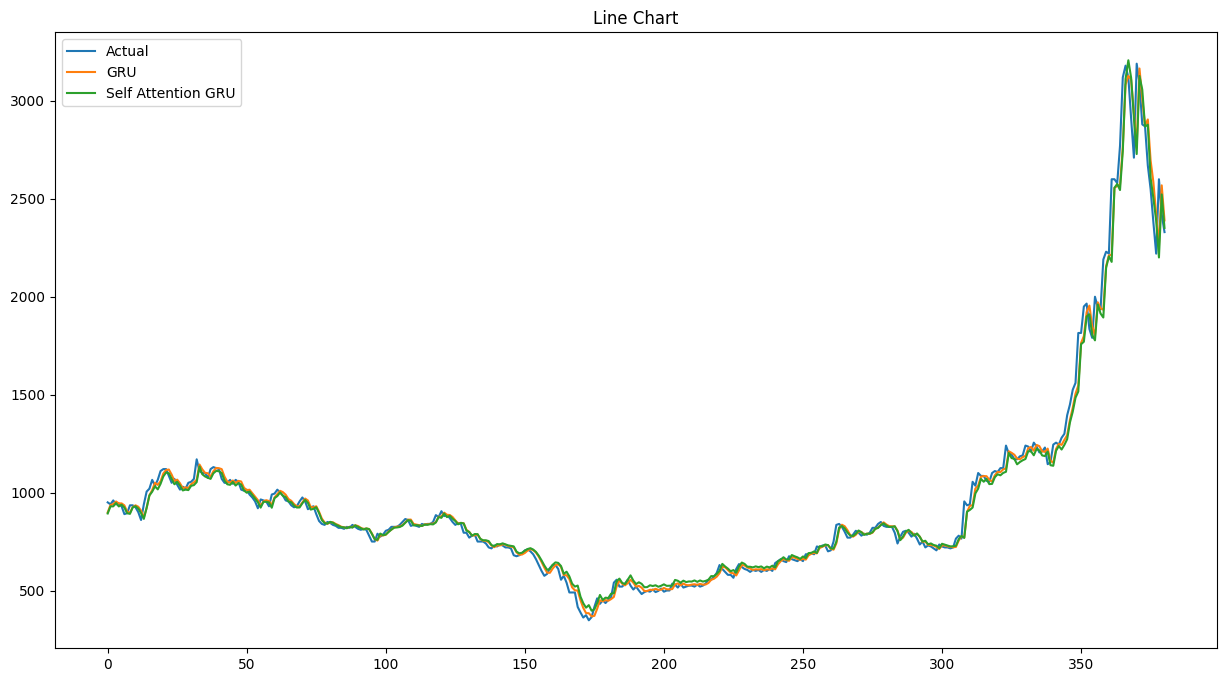

In [52]:
plt.figure(figsize=(15, 8))

sns.lineplot(x=range(len(y_true)), y=y_true, label='Actual')

flat_predict = np.array(predict).flatten()
sns.lineplot(x=range(len(flat_predict)), y=flat_predict, label='GRU')

flat_predict_self_attention = np.array(predict_self_attention).flatten()
sns.lineplot(x=range(len(flat_predict_self_attention)), y=flat_predict_self_attention, label='Self Attention GRU')

plt.title('Line Chart')
plt.legend(loc='upper left')
plt.show()


Terlihat bahwa prediksi yang dihasilkan oleh GRU maupun self-attentioned GRU sudah cukup baik sehingga hasilnya sangat mirip atau mendekati value aslinya